This is a simple notebook demo to illustrate typically how OptimalFlow's autoPipe and autoViz modules work

In [ ]:
# Install external packages in binder environment.
!pip install xgboost
!pip install matplotlib

In [14]:

# Reset autoCV estimators default parameters
from optimalflow.utilis_func import pipeline_splitting_rule, update_parameters,reset_parameters
reset_parameters()

# Modify some autoCV estimators default parameters
update_parameters(mode = "cls", estimator_name = "mlp", hidden_layer_sizes = [10],activation=["relu"],learning_rate = ["constant"],solver = ["sgd"])
update_parameters(mode = "cls", estimator_name = "svm", C=[0.1],kernel=["linear"])
update_parameters(mode = "cls", estimator_name = "ada", n_estimators =[50],learning_rate=[1])
update_parameters(mode = "cls", estimator_name = "rf", n_estimators =[50],max_depth=[2])
update_parameters(mode = "cls", estimator_name = "gb", n_estimators =[50],max_depth=[2],learning_rate=[1])
update_parameters(mode = "cls", estimator_name = "xgb", n_estimators =[50],max_depth=[2],learning_rate=[1])


from optimalflow.autoPipe import autoPipe
import pandas as pd
from optimalflow.funcPP import PPtools
from optimalflow.autoPP import dynaPreprocessing

from optimalflow.autoFS import dynaFS_clf
from optimalflow.autoCV import evaluate_model,dynaClassifier,dynaRegressor
# Import sample data
df = pd.read_csv('./data/preprocessing/breast_cancer.csv')
# Custom settings for the autoPP module
custom_parameters = {
    "scaler" : ["None", "standard"],
    # threshold number of category dimension
    "encode_band" : [4],
    # low dimension encoding
    "low_encode" : ["onehot","label"], 
    # high dimension encoding
    "high_encode" : ["frequency", "mean"],
    "winsorizer" : [(0.05,0.05),(0.1,0.1)],
    "sparsity" : [0.46],
    "cols" : [1000]
}

Done with the parameters reset.
Previous Parameters are: {'hidden_layer_sizes': [10, 50, 100], 'activation': ['identity', 'relu', 'tanh', 'logistic'], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'solver': ['lbfgs', 'sgd', 'adam']}
Current Parameters are updated as: {'hidden_layer_sizes': [10], 'activation': ['relu'], 'learning_rate': ['constant'], 'solver': ['sgd']}
Done with the parameters update.
Previous Parameters are: {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10]}
Current Parameters are updated as: {'C': [0.1], 'kernel': ['linear']}
Done with the parameters update.
Previous Parameters are: {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 1, 10, 100]}
Current Parameters are updated as: {'n_estimators': [50], 'learning_rate': [1]}
Done with the parameters update.
Previous Parameters are: {'n_estimators': [5, 50, 250], 'max_depth': [2, 4, 8, 16, 32]}
Current Parameters are updated as: {'n_estimators': [50], 'max_depth': [2]}
Done with the para

In [15]:
# Create Pipeline Cluster Traversal Experiments by autoPipe
pipe = autoPipe(
[("autoPP",dynaPreprocessing(custom_parameters = custom_parameters, label_col = 'diagnosis', model_type = "cls")),
("datasets_splitting",pipeline_splitting_rule(val_size = 0.2, test_size = 0.2, random_state = 13)),
("autoFS",dynaFS_clf(fs_num = 8, random_state=13, cv = 5, in_pipeline = True, input_from_file = False)),
("autoCV",dynaClassifier(random_state = 13,cv_num = 5,in_pipeline = True, input_from_file = False)),
("model_evaluate",evaluate_model(model_type = "cls"))])

In [16]:
# Notebook display settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns',None,'display.max_rows',None)
pd.set_option('max_colwidth', -1)

# Get outputs into DICT_PREPROCESSING,DICT_FEATURE_SELECTION,DICT_MODELS_EVALUATION,DICT_DATA,dyna_report. More details about the attributes in https://optimal-flow.readthedocs.io/en/latest/autoPipe.html#module-optimalflow.autoPipe
DICT_PREPROCESSING,DICT_FEATURE_SELECTION,DICT_MODELS_EVALUATION,DICT_DATA,dyna_report= pipe.fit(df)

Now in Progress - autoFS & autoCV Iteration: Estimate about 0.0 minutes left  [####################] 100.0%
The top 5 Models with Best Performance Metrics:
          Dataset Model_Name  \
3943  Dataset_563  mlp         
4312  Dataset_616  lgr         
3481  Dataset_497  mlp         
2546  Dataset_363  gb          
1139  Dataset_162  gb          

                                                                                                                      Best_Parameters  \
3943  [('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]   
4312  [('C', 100), ('random_state', 13)]                                                                                                
3481  [('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]   
2546  [('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]             

In [18]:
# You can check each of the output. 
DICT_MODELS_EVALUATION['Dataset_0']

,Model_Name,Accuracy,Precision,Recall,Latency,Best_Parameters,Dataset
0,lgr,0.895,0.880,0.88,3.0,"[('C', 1000), ('random_state', 13)]",Dataset_0
0,svm,0.912,0.885,0.92,3.0,"[('C', 0.1), ('kernel', 'linear')]",Dataset_0
0,mlp,0.439,0.439,1.00,3.0,"[('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]",Dataset_0
0,rf,0.877,0.821,0.92,12.0,"[('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",Dataset_0
0,ada,0.912,0.955,0.84,17.0,"[('learning_rate', 1), ('n_estimators', 50), ('random_state', 13)]",Dataset_0
0,gb,0.877,0.846,0.88,3.0,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",Dataset_0
0,xgb,0.912,0.955,0.84,2.0,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",Dataset_0


In [19]:
dyna_report.head(10)
dyna_report.to_csv("dyna_report.csv",index=False)

,Dataset,Model_Name,Best_Parameters,Accuracy,Precision,Recall,Latency
3943,Dataset_563,mlp,"[('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]",0.947,0.958,0.92,3.5
4312,Dataset_616,lgr,"[('C', 100), ('random_state', 13)]",0.947,0.923,0.96,3.0
3481,Dataset_497,mlp,"[('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]",0.930,1.000,0.84,3.0
2546,Dataset_363,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,1.0
1139,Dataset_162,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,2.0
3901,Dataset_557,mlp,"[('activation', 'relu'), ('hidden_layer_sizes', (10,)), ('learning_rate', 'constant'), ('random_state', 13), ('solver', 'sgd')]",0.930,0.957,0.88,2.0
1314,Dataset_187,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,3.0
1412,Dataset_201,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,3.0
1678,Dataset_239,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,3.0
1916,Dataset_273,gb,"[('learning_rate', 1), ('max_depth', 2), ('n_estimators', 50), ('random_state', 13)]",0.930,0.957,0.88,3.0


In [15]:
# DICT_DATA stores the dataset after feature preprocessing for further custom usage
DICT_DATA['Dataset_0']['DICT_TEST']["X"].head(10)

,concavity_mean,concave points_mean,perimeter_mean,radius_mean,texture_mean
264,0.09061,0.065270,111.60,17.19,22.07
231,0.01633,0.006588,71.76,11.32,26.60
197,0.11030,0.057780,117.40,18.08,21.84
172,0.20320,0.109700,102.50,15.46,13.04
54,0.05253,0.033340,97.26,15.10,22.02
33,0.16570,0.075930,127.90,19.27,26.47
68,0.25080,0.043750,60.73,9.72,17.33
237,0.09042,0.060220,132.50,20.48,21.46
51,0.01857,0.017230,87.21,13.64,16.34
196,0.13850,0.065260,90.63,13.77,22.29


In [21]:
DICT_PREPROCESSING['Dataset_0']

"winsor_0-Scaler_None-- Encoded Features:['diagnosis', 'Size_3', 'area_mean', 'compactness_mean', 'concave points_mean', 'concavity_mean', 'fractal_dimension_mean', 'perimeter_mean', 'radius_mean', 'smoothness_mean', 'symmetry_mean', 'texture_mean', 'Frequency_Age', 'onehot_Position_1_left', 'onehot_Position_1_right', 'Frequency_Position_2', 'Frequency_Size_1', 'Frequency_Size_2', 'onehot_Treatment_no-recurrence-events', 'onehot_Treatment_recurrence-events', 'onehot_Type_1_ge40', 'onehot_Type_1_lt40', 'onehot_Type_1_premeno', 'onehot_Type_2_NaN', 'onehot_Type_2_no', 'onehot_Type_2_yes', 'onehot_Type_3_no', 'onehot_Type_3_yes']"

In [37]:
import pickle
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
# Save the outputs as pickles for further analysis and visualization
save_obj(DICT_PREPROCESSING,"dict_preprocess")
save_obj(DICT_DATA,"dict_data")
save_obj(DICT_MODELS_EVALUATION,"dict_models_evaluate")
save_obj(dyna_report,"dyna_report")

In [3]:
# Load the outputs from picles
DICT_PREP = load_obj("dict_preprocess")
dyna_report = load_obj("dyna_report")
DICT_DATA = load_obj("dict_data")
DICT_PREP['Dataset_0']

"winsor_0-Scaler_None-- Encoded Features:['diagnosis', 'Size_3', 'area_mean', 'compactness_mean', 'concave points_mean', 'concavity_mean', 'fractal_dimension_mean', 'perimeter_mean', 'radius_mean', 'smoothness_mean', 'symmetry_mean', 'texture_mean', 'Frequency_Age', 'onehot_Position_1_left', 'onehot_Position_1_right', 'Frequency_Position_2', 'Frequency_Size_1', 'Frequency_Size_2', 'onehot_Treatment_no-recurrence-events', 'onehot_Treatment_recurrence-events', 'onehot_Type_1_ge40', 'onehot_Type_1_lt40', 'onehot_Type_1_premeno', 'onehot_Type_2_NaN', 'onehot_Type_2_no', 'onehot_Type_2_yes', 'onehot_Type_3_no', 'onehot_Type_3_yes']"

In [7]:
# autoViz Demo 1:
# Use autoViz's built-in function to create model retrieval diagram
# Diagram will be saved as an html file and stored as ./test/temp-plot.html
# You can find 
from optimalflow.autoViz import autoViz
viz = autoViz(preprocess_dict=DICT_PREP,report=dyna_report)
viz.clf_model_retrieval(metrics='accuracy')


'temp-plot.html'

In [1]:
# autoViz Demo 2:
# Use autoViz's built-in function to create Pipeline Cluster Model Evaluation Report (Dynamic Table)
# Diagram will be saved as an html file and stored as ./test/temp-plot.html
viz = autoViz(report = dyna_report)
viz.clf_table_report()

Here're some regular visualization examples for reference:

In [8]:
# Check stored preprocessed datasets, which is imported from pickles
DICT_DATA['Dataset_0']['DICT_Train']["X"].head(10)
DICT_DATA['Dataset_0']['DICT_Train']["y"].head(10)

,concave points_mean,concavity_mean,radius_mean,area_mean,perimeter_mean,texture_mean,compactness_mean,smoothness_mean
204,0.03821,0.08005,12.470,481.9,81.09,18.60,0.10580,0.09965
198,0.06772,0.11140,19.180,1148.0,127.50,22.49,0.14280,0.08523
93,0.02780,0.03974,13.450,555.1,86.60,18.30,0.08165,0.10220
78,0.12790,0.25080,20.180,1245.0,135.10,23.97,0.22330,0.12150
128,0.08534,0.11380,15.100,674.5,99.58,16.39,0.18070,0.11500
268,0.01615,0.03900,12.870,512.2,82.38,16.21,0.06219,0.09425
273,0.01407,0.01103,9.742,289.9,61.50,15.67,0.04689,0.09037
10,0.03323,0.03299,16.020,797.8,102.70,23.24,0.06669,0.08206
282,0.09464,0.16260,19.400,1145.0,127.20,18.18,0.14420,0.10370
38,0.02899,0.02398,14.990,698.8,95.54,25.20,0.05131,0.09387


204    0
198    1
93     0
78     1
128    0
268    0
273    0
10     1
282    1
38     1
Name: diagnosis, dtype: int32

In [10]:
import joblib
from sklearn.svm import SVC
# mdl = joblib.load('./pkl/{}_clf_model.pkl')
X_train = DICT_DATA['Dataset_0']['DICT_Train']["X"]
y_train = DICT_DATA['Dataset_0']['DICT_Train']["y"]
X_test = DICT_DATA['Dataset_0']['DICT_TEST']["X"]
y_test = DICT_DATA['Dataset_0']['DICT_TEST']["y"]

mdl = SVC(C = 0.1, kernel = 'linear')
mdl.fit(X_train,y_train)
y_true = y_test
y_pred = mdl.predict(X_test)

SVC(C=0.1, kernel='linear')

In [11]:
# Confusion matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print(classification_report(y_true, y_pred))

precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.94      0.97      0.95        31

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



SVC(C=0.1, kernel='linear')

Text(0.5, 1.0, 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[25  2]
 [ 1 30]]


Text(0.5, 1.0, 'Normalized confusion matrix')

Normalized confusion matrix
[[0.93 0.07]
 [0.03 0.97]]


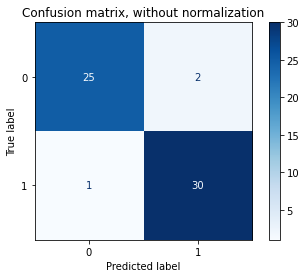

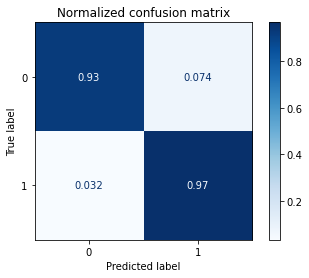

In [16]:
# Give confusion matrix plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X_train = DICT_DATA['Dataset_0']['DICT_Train']["X"]
y_train = DICT_DATA['Dataset_0']['DICT_Train']["y"]
X_test = DICT_DATA['Dataset_0']['DICT_TEST']["X"]
y_test = DICT_DATA['Dataset_0']['DICT_TEST']["y"]
mdl = SVC(C = 0.1, kernel = 'linear')
mdl.fit(X_train,y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mdl, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

SVC(C=0.1, kernel='linear')

Text(0.5, 1.0, 'Receiver Operating Characteristic(ROC Plot)')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

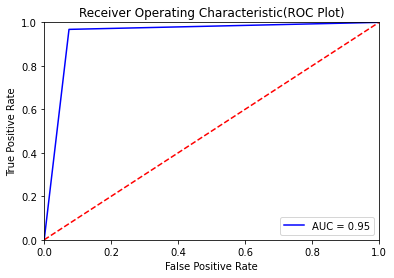

In [14]:
# Give ROC plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
# mdl = joblib.load('./pkl/_clf_model.pkl')
X_train = DICT_DATA['Dataset_0']['DICT_Train']["X"]
y_train = DICT_DATA['Dataset_0']['DICT_Train']["y"]
X_test = DICT_DATA['Dataset_0']['DICT_TEST']["X"]
y_test = DICT_DATA['Dataset_0']['DICT_TEST']["y"]
mdl = SVC(C = 0.1, kernel = 'linear')
mdl.fit(X_train,y_train)
preds = mdl.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic(ROC Plot)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()